# Importing Required Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
file = pd.read_csv('summer_olympics.csv')
file

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [3]:
# Dropping null values

In [4]:
file = file.dropna()

# Q1. In how many cities **Summer Olympics** is *held* so far?

In [5]:
cities = file['City'].unique()

total_cities = len(cities)
print(f'Summer Olympics have been held in total of {total_cities} cities till now... \nThey are as follows: ')
print('-------------------------------------------------------------------------------')

i = 1
for city in cities:
    print(f'{i}.', city)
    i += 1

Summer Olympics have been held in total of 22 cities till now... 
They are as follows: 
-------------------------------------------------------------------------------
1. Athens
2. Paris
3. St Louis
4. London
5. Stockholm
6. Antwerp
7. Amsterdam
8. Los Angeles
9. Berlin
10. Helsinki
11. Melbourne / Stockholm
12. Rome
13. Tokyo
14. Mexico
15. Munich
16. Montreal
17. Moscow
18. Seoul
19. Barcelona
20. Atlanta
21. Sydney
22. Beijing


# Q2. Which Country is having **most** number of *Gold Medals* so far? (Top 5)

In [6]:
# Selecting all those countries that have won gold atleast 1 time

In [7]:
gold_data = file[file['Medal'] == 'Gold']
gold_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [8]:
# Counting number of golds for each country
# the frequency of each country in the *gold_data* will give the number of gold won by that particular country

In [9]:
gold_data['Country']

0        HUN
3        GRE
6        HUN
9        AUT
13       USA
        ... 
31145    IRI
31149    KOR
31153    RUS
31157    RUS
31161    IRI
Name: Country, Length: 10484, dtype: object

In [10]:
country_gold = pd.DataFrame(Counter(gold_data['Country']), index=['Gold']).T

k = country_gold.nlargest(5, ['Gold']).T

print('The top 5 countries with most number \nof gold medals are as follows :- ')
print('-----------------------------------------------')
count = 1
for i in k:
    print(f"{count}.", i)
    count += 1

The top 5 countries with most number 
of gold medals are as follows :- 
-----------------------------------------------
1. USA
2. URS
3. GBR
4. ITA
5. GER


# Q3. Which sport is having **most** number of *Gold Medals* so far? (Top 5)

In [72]:
# The frequency of each sport int the gold_data will give the number of golds for that particular sport

In [11]:
sport_gold = pd.DataFrame(Counter(file['Sport']), index=['Sport_medal']).T
sport_gold_maximum_5 = sport_gold.nlargest(5, ['Sport_medal']).T

print('The top 5 Sport with most number \nof gold medals are as follows :- ')
print('-----------------------------------------')
count = 1
for i in sport_gold_maximum_5:
    print(f"{count}.", i)
    count += 1

The top 5 Sport with most number 
of gold medals are as follows :- 
-----------------------------------------
1. Aquatics
2. Athletics
3. Rowing
4. Gymnastics
5. Fencing


<AxesSubplot:ylabel='Sport'>

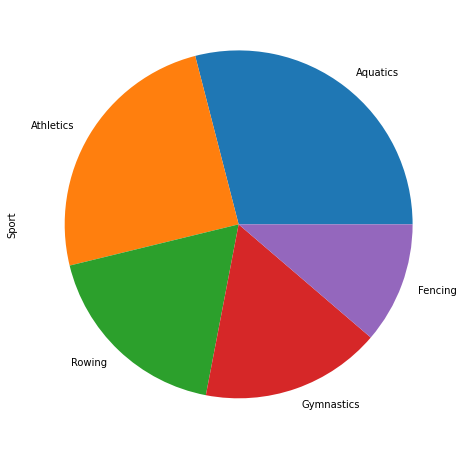

In [15]:
# Representing them in a pie chart
file['Medal'].unique()
gold = file[file['Medal'] == 'Gold']
gold['Sport'].value_counts().head().plot.pie(figsize = (8,8))

<AxesSubplot:>

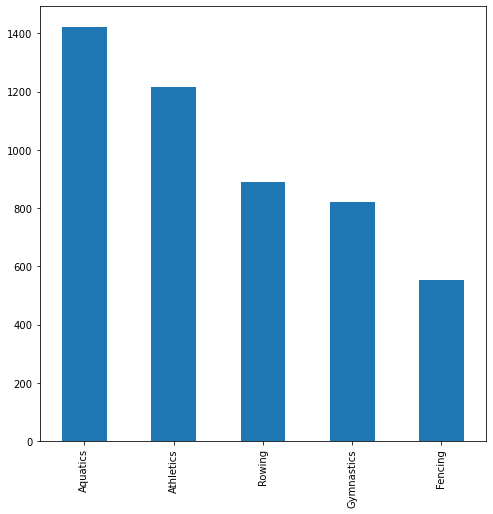

In [18]:
# Representing them in a bar chart
gold['Sport'].value_counts().head().plot.bar(figsize = (8,8))

# Q4. Which *sport* is having most number of medals so far? (Top 5)


In [98]:
file

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


<AxesSubplot:xlabel='Sport'>

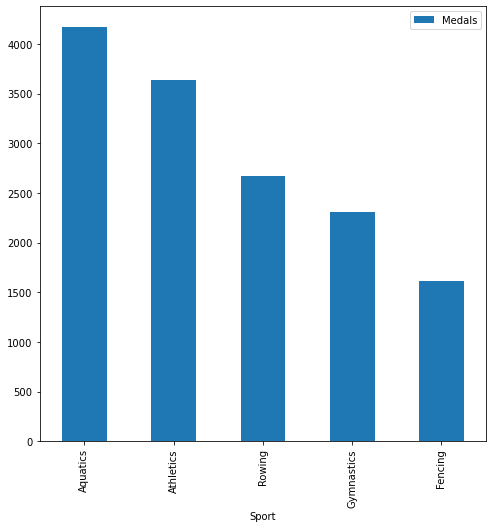

In [28]:
# Top 5 Sport having most number of medals
no_of_medals = []
for sport in file['Sport'].unique():
    no_of_medals.append([sport, len(file[file['Sport'] == sport])])

ans = pd.DataFrame(no_of_medals, columns = ['Sport','Medals']).sort_values(by = 'Medals', ascending = False)
ans.head().plot.bar(x = 'Sport', y = 'Medals', figsize=(8,8))

In [50]:
print('So the top 5 Sport with most number of medals are: ')
print('---------------------------------------------------')
for sport in ans['Sport'].head(5):
    print(sport)

So the top 5 Sport with most number of medals are: 
---------------------------------------------------
Aquatics
Athletics
Rowing
Gymnastics
Fencing


# Q5. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

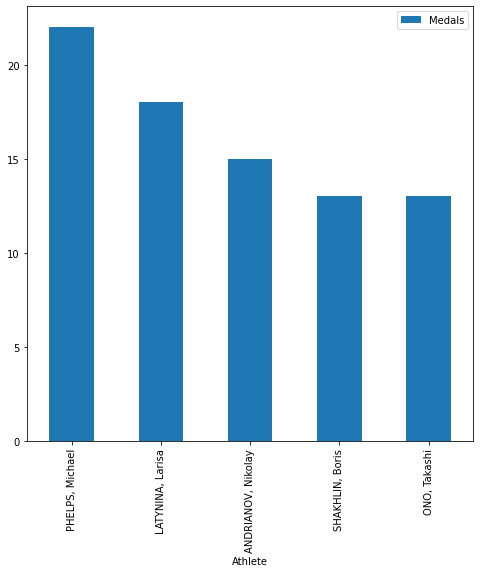

In [43]:
players = []
for player in file['Athlete'].unique():
    players.append([player, len(file[file['Athlete'] == player])])

    
most_number_of_medals = pd.DataFrame(players, columns=['Athlete', 'Medals']).sort_values(by='Medals', ascending=False)
most_number_of_medals.head().plot.bar(x='Athlete', y='Medals', figsize=(8,8))

In [128]:
print('So the top 5 player with most number of medals are: ')
print('---------------------------------------------------')
for player in most_number_of_medals['Athlete'].head(5):
    print(player)

So the top 5 player with most number of medals are: 
---------------------------------------------------
PHELPS, Michael
LATYNINA, Larisa
ANDRIANOV, Nikolay
SHAKHLIN, Boris
ONO, Takashi


# Q6. Which player has won most number of GOLD medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

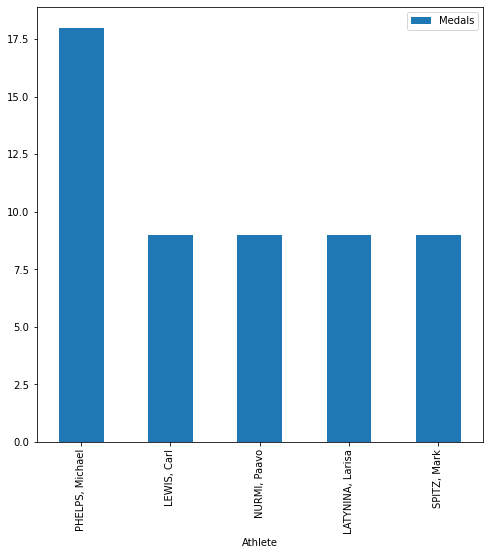

In [56]:
players_gold = []

for player in gold_data['Athlete'].unique():
    players_gold.append([player, len(gold_data[gold_data['Athlete'] == player])])

top_5_palyers = pd.DataFrame(players_gold, columns = ['Athlete', 'Medals']).sort_values(by='Medals', ascending=False).head()
top_5_palyers.plot.bar(x='Athlete', y='Medals', figsize=(8,8))

In [57]:
print('So the top 5 player with most number of GOLD medals are: ')
print('---------------------------------------------------')
for player in top_5_palyers['Athlete'].head(5):
    print(player)

So the top 5 player with most number of GOLD medals are: 
---------------------------------------------------
PHELPS, Michael
LEWIS, Carl
NURMI, Paavo
LATYNINA, Larisa
SPITZ, Mark


# Q7. In which year India won first gold medal in Summer Olympics?

In [119]:
india_gold = gold_data[gold_data['Country'] == 'IND']
ans = india_gold['Year']
k = ans.first_valid_index()
print('-------------------------------------------------------------------------------------')
print(f'So the first GOLD medal won by INDIA in Summer Olympics was in the year {ans[k]}. ')
print('-------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------
So the first GOLD medal won by INDIA in Summer Olympics was in the year 1928. 
-------------------------------------------------------------------------------------


# Q8. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

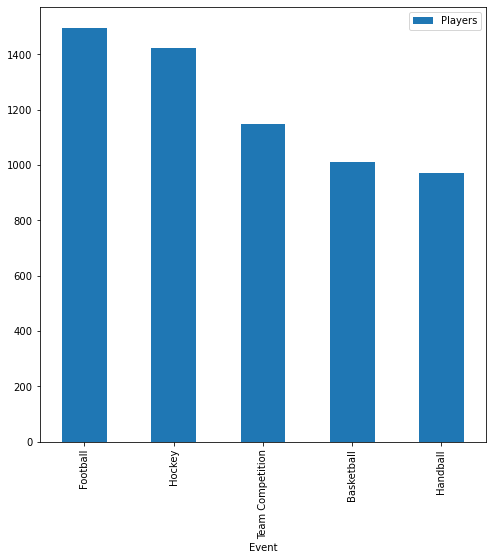

In [127]:
popular_event = []
for event in file['Event'].unique():
    popular_event.append([event, len(file[file['Event'] == event])])
top_5_events = pd.DataFrame(popular_event, columns=['Event', 'Players']).sort_values(by='Players', ascending=False).head(5)
top_5_events.plot.bar(x='Event', y='Players', figsize=(8,8))

In [142]:
print('So the top 5 Popular Sport with most number of players are: ')
print('---------------------------------------------------')
for player in top_5_events['Event'].head(5):
    print(player)

So the top 5 Popular Sport with most number of players are: 
---------------------------------------------------
Football
Hockey
Team Competition
Basketball
Handball


# Q9. Which sport is having most female Gold Medalists? (Top 5)

In [135]:
gender = gold_data['Gender'].unique()
gender

array(['Men', 'Women'], dtype=object)

In [137]:
female_gold = gold_data[gold_data['Gender'] == 'Women']
female_gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


<AxesSubplot:xlabel='Sport'>

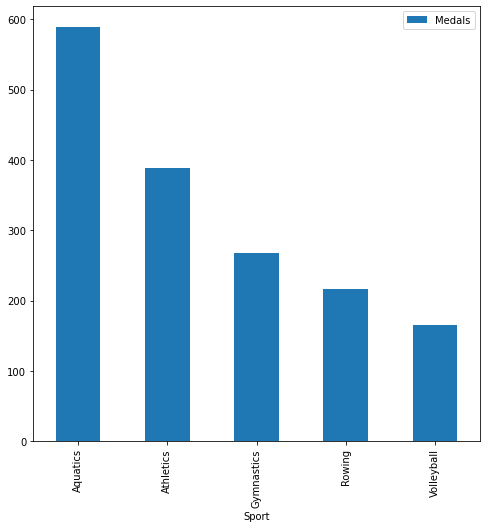

In [139]:
female_gold_sport = []
for sport in female_gold['Sport'].unique():
    female_gold_sport.append([sport, len(female_gold[female_gold['Sport'] == sport])])
female_gold_sport = pd.DataFrame(female_gold_sport, columns = ['Sport', 'Medals']).sort_values(by='Medals', ascending=False).head(5)

female_gold_sport.plot.bar(x='Sport', y='Medals', figsize=(8,8))

In [141]:
print('-----------------------------------------------------------------')
print('So the top 5 Popular Sport with most female gold medalist are: ')
print('-----------------------------------------------------------------')
for sport in female_gold_sport['Sport']:
    print(sport)

-----------------------------------------------------------------
So the top 5 Popular Sport with most female gold medalist are: 
-----------------------------------------------------------------
Aquatics
Athletics
Gymnastics
Rowing
Volleyball
